In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from brokenaxes import brokenaxes
import pickle

def mahalanobis_dist(vals, cov, real_vals):
    dif = (vals - real_vals)
    return np.sqrt(np.linalg.multi_dot([dif, np.linalg.inv(cov), dif]))

def confidence_ellipse(val, cov, ax, n_std=1.0, facecolor='none', **kwargs):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = val[0]

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = val[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


## data_2003


In [2]:
path = '/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/'
real_vals = [7.68e-4, -1.98, -2.23]
real_cov = np.array([[(0.04e-4)**2, 0, 0],
                    [0, (0.005)**2, 0],
                    [0, 0, (0.03)**2]])
piv = 100

folders = [
    f'{path}fit_2003/crab_band_fit',
    f'{path}fit_2003/crab_band_fit_20_400',
    f'{path}fit_2003/crab_band_fit_30_400',
    # f'{path}fit_2003/crab_band_fit_35_81',
    f'{path}fit_2_2003_combined/crab_band_fit',
    f'{path}fit_2_2003_combined/crab_band_fit_20_600',
    f'{path}fit_2_2003_combined/crab_band_fit_35_1000',
    f'{path}fit_2017/crab_band_fit_spimodfit'
    # f'{path}fit_3_2003_combined/crab_band_fit',
]
# folders = [
#     f'{path}/normal_new/0374/pre_ppc',
#     f'{path}/normal_reduced_bkg_10_new/0374/pre_ppc',
#     f'{path}/normal_new/0374/spimodfit',
#     f'{path}/normal_reduced_bkg_10_new/0374/spimodfit',
# ]

d_M = []
for p in folders:
    val = np.loadtxt(f"{p}/fit_val.txt")[:3]
    cov = np.loadtxt(f"{p}/fit_cov.txt")[:3, :3]

    with open(f"{p}/fit_val.txt", 'r') as f:
        if "Crab beta" not in f.readline():
            val = val[:2]
            cov = cov[:2, :2]
            d_M.append(mahalanobis_dist(val, cov, real_vals[:2]))
            continue
    print(val)
    print("\n")
    print(cov)
    d_M.append(mahalanobis_dist(val, cov, real_vals))

names = [
    'SE 20-600keV',
    'SE 20-400keV',
    'SE 30-400keV',
    #3_SE/crab_band_fit_35_81',
    'combined 20-1000keV',
    'combined 20-600keV',
    'combined 35-1000keV',
    # "combined 3 20-1000keV",
    'spimodfit',
]

std_devs = [
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
]

names = [f"{std_devs[i]}$\\sigma$-{names[i]}: $d_M$ = {d_M[i]:.3f}" for i in range(len(d_M))]

edgecolors = [
    "C0",
    "C1",
    "C2",
    # "C3",
    "C0",
    "C1",
    "C4",
    "C5"
]
linestyles = [
    "solid",
    "solid",
    "solid",
    # "solid",
    "dotted",
    "dotted",
    'dotted',
    "dashdot",
    "dashed",
    "dotted",
]


[ 8.52391635e-04 -1.94577953e+00 -2.23773166e+00]


[[ 8.74172194e-12  9.61746583e-09 -2.95144665e-08]
 [ 9.61746583e-09  1.28669106e-05 -3.22898105e-05]
 [-2.95144665e-08 -3.22898105e-05  8.74625216e-04]]
[ 8.53806025e-04 -1.94520347e+00 -2.22145706e+00]


[[ 8.72430364e-12  9.36175975e-09 -2.52173503e-08]
 [ 9.36175975e-09  1.21679360e-05 -2.65021301e-05]
 [-2.52173503e-08 -2.65021301e-05  6.78277939e-04]]
[ 8.54404576e-04 -1.88289227e+00 -2.31833395e+00]


[[ 9.32895891e-12  1.26375955e-08 -6.43105894e-08]
 [ 1.26375955e-08  2.46762184e-05 -1.03710948e-04]
 [-6.43105894e-08 -1.03710948e-04  4.48791110e-03]]
[ 7.93364190e-04 -2.01711456e+00 -2.15614110e+00]


[[ 2.92186690e-11  4.17269028e-08 -3.73939981e-08]
 [ 4.17269028e-08  6.30268520e-05 -5.12042982e-05]
 [-3.73939981e-08 -5.12042982e-05  1.03046260e-04]]


(-2.5, -2.0)

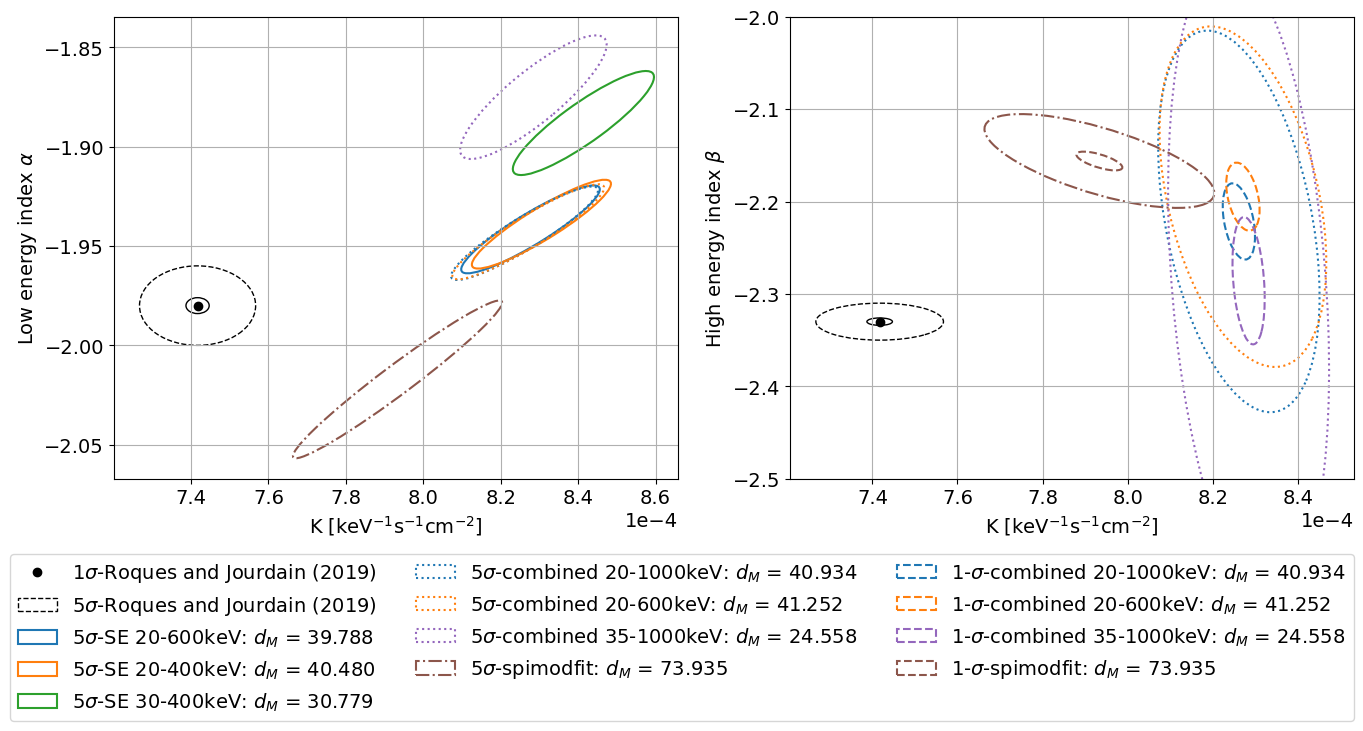

In [5]:
import math
%matplotlib inline
plt.rcParams.update({'font.size': 14})
fig, [ax, ax2] = plt.subplots(1, 2, figsize=(16, 6))


ax.plot(real_vals[0], real_vals[1], "ko", label="1$\sigma$-Roques and Jourdain (2019)")
confidence_ellipse(real_vals[:2], real_cov, ax, n_std=1, edgecolor="black", ls="solid")
confidence_ellipse(real_vals[:2], real_cov, ax, n_std=5, edgecolor="black", ls="dashed", label="5$\sigma$-Roques and Jourdain (2019)")

ax2.plot(real_vals[0], real_vals[2], "ko", )
confidence_ellipse(real_vals[:3:2], real_cov, ax2, n_std=1, edgecolor="black", ls="solid")
confidence_ellipse(real_vals[:3:2], real_cov, ax2, n_std=5, edgecolor="black", ls="dashed")

for folder, name, edgecolor, linestyle, std_dev in zip(folders, names, edgecolors, linestyles, std_devs):
    val = np.loadtxt(f"{folder}/fit_val.txt")
    cov = np.loadtxt(f"{folder}/fit_cov.txt")
    confidence_ellipse(val[:2], cov[:2, :2], ax, n_std=std_dev, edgecolor=edgecolor, label=name, ls=linestyle, linewidth=1.5)

    with open(f"{folder}/fit_val.txt", "r") as f:
        header = f.readlines()[0]

    if "Crab beta" in header:
        confidence_ellipse(val[0:3:2], cov[0:3:2, 0:3:2], ax2, n_std=std_dev, edgecolor=edgecolor, ls=linestyle, linewidth=1.5)
        confidence_ellipse(val[0:3:2], cov[0:3:2, 0:3:2], ax2, n_std=1, edgecolor=edgecolor, ls="dashed", linewidth=1.5, label=f"1-$\sigma${name[9:]}")


ax.autoscale()
ax.grid()

ax2.autoscale()
ax2.grid()
# fig.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
fig.legend(loc='lower center', bbox_to_anchor=(0.48, -0.31), ncol=3)
#plt.legend()
ax.set_xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
ax.set_ylabel("Low energy index $\\alpha$")

ax2.set_xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
ax2.set_ylabel("High energy index $\\beta$")
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax2.set_ylim(-2.5, -2.0)

# fig.suptitle('Data 2003', position=(0.5, 0.95))

In [10]:
fig.savefig(f"{path}/comparison_plot_2003_with_spimodfit.pdf", bbox_inches='tight')

# data_2017

In [6]:
path = '/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/'
real_vals = [7.417e-4, -1.98, -2.33]
real_cov = np.array([[(0.03e-4)**2, 0, 0],
                    [0, (0.004)**2, 0],
                    [0, 0, (0.03)**2]])
piv = 100

folders = [
    f'{path}fit_2017/crab_band_fit',
    f'{path}fit_2017/crab_band_fit_20_400',
    f'{path}fit_2017/crab_band_fit_30_400',
    # f'{path}fit_2017/crab_band_fit_35_81',
    f'{path}fit_2_2017_combined/crab_band_fit',
    f'{path}fit_2_2017_combined/crab_band_fit_20_600',
    f'{path}fit_2_2017_combined/crab_band_fit_35_1000',
    f'{path}fit_2017/crab_band_fit_spimodfit'
]
# folders = [
#     f'{path}/normal_new/0374/pre_ppc',
#     f'{path}/normal_reduced_bkg_10_new/0374/pre_ppc',
#     f'{path}/normal_new/0374/spimodfit',
#     f'{path}/normal_reduced_bkg_10_new/0374/spimodfit',
# ]

d_M = []
for p in folders:
    val = np.loadtxt(f"{p}/fit_val.txt")[:3]
    cov = np.loadtxt(f"{p}/fit_cov.txt")[:3, :3]

    with open(f"{p}/fit_val.txt", 'r') as f:
        if "Crab beta" not in f.readline():
            val = val[:2]
            cov = cov[:2, :2]
            d_M.append(mahalanobis_dist(val, cov, real_vals[:2]))
            continue
    print(val)
    print("\n")
    print(cov)
    d_M.append(mahalanobis_dist(val, cov, real_vals))

names = [
    'SE 20-600keV',
    'SE 20-400keV',
    'SE 30-400keV',
    #3_SE/crab_band_fit_35_81',
    'combined 20-1000keV',
    'combined 20-600keV',
    'combined 35-1000keV',
    'spimodfit'
]

std_devs = [
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5
]

names = [f"{std_devs[i]}$\\sigma$-{names[i]}: $d_M$ = {d_M[i]:.3f}" for i in range(len(d_M))]

edgecolors = [
    "C0",
    "C1",
    "C2",
    # "C3",
    "C0",
    "C1",
    "C4",
    "C5"
]
linestyles = [
    "solid",
    "solid",
    "solid",
    # "solid",
    "dotted",
    "dotted",
    'dotted',
    "dashdot",
    "dashed",
    "dotted",
]


[ 8.26166326e-04 -1.94359403e+00 -2.22153782e+00]


[[ 1.44042988e-11  1.63806883e-08 -6.12910615e-08]
 [ 1.63806883e-08  2.21367511e-05 -6.84084134e-05]
 [-6.12910615e-08 -6.84084134e-05  1.70557249e-03]]
[ 8.27121066e-04 -1.94284727e+00 -2.19475346e+00]


[[ 1.53702690e-11  1.73174288e-08 -5.56077840e-08]
 [ 1.73174288e-08  2.28736192e-05 -6.13570421e-05]
 [-5.56077840e-08 -6.13570421e-05  1.35838148e-03]]
[ 8.28451917e-04 -1.87512554e+00 -2.28567903e+00]


[[ 1.43282345e-11  2.00433015e-08 -7.31700452e-08]
 [ 2.00433015e-08  3.86878986e-05 -1.08128455e-04]
 [-7.31700452e-08 -1.08128455e-04  4.74900551e-03]]
[ 7.93364190e-04 -2.01711456e+00 -2.15614110e+00]


[[ 2.92186690e-11  4.17269028e-08 -3.73939981e-08]
 [ 4.17269028e-08  6.30268520e-05 -5.12042982e-05]
 [-3.73939981e-08 -5.12042982e-05  1.03046260e-04]]


(-2.5, -2.0)

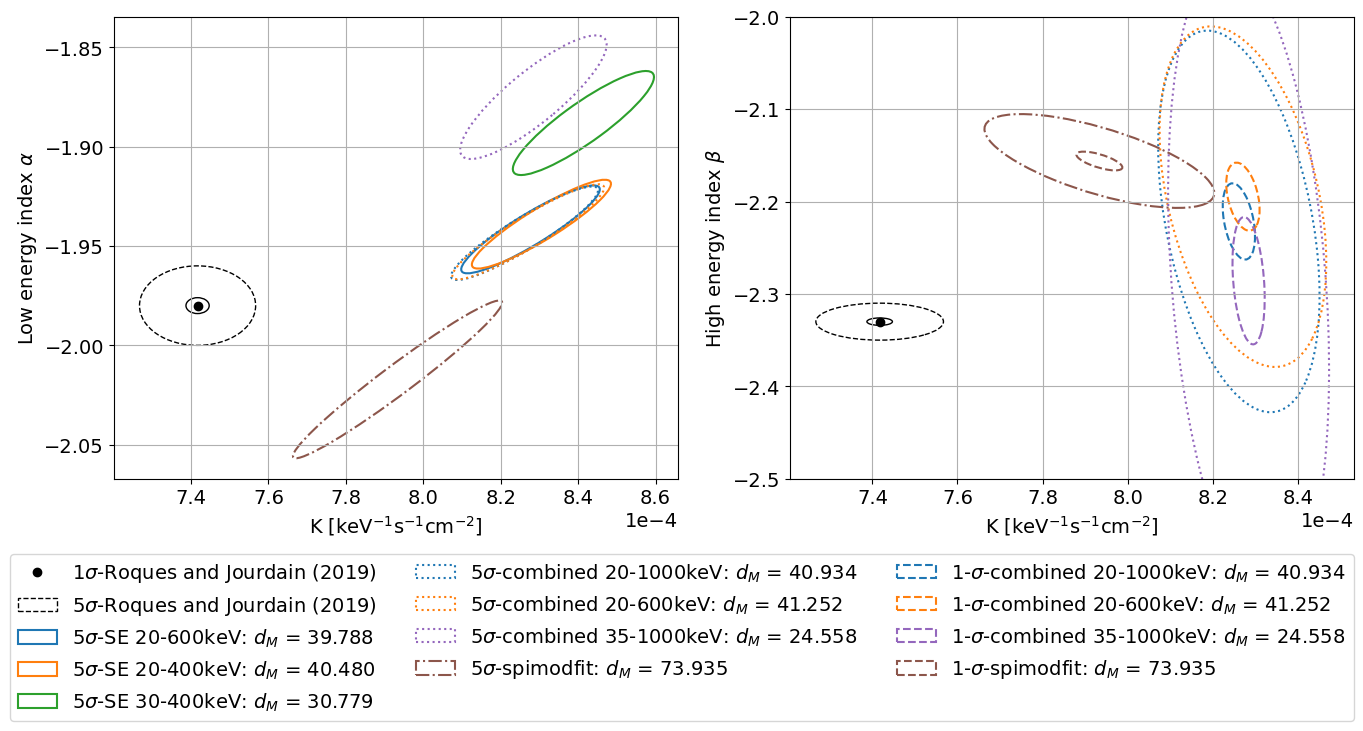

In [9]:
import math
%matplotlib inline

fig, [ax, ax2] = plt.subplots(1, 2, figsize=(16, 6))


ax.plot(real_vals[0], real_vals[1], "ko", label="1$\sigma$-Roques and Jourdain (2019)")
confidence_ellipse(real_vals[:2], real_cov, ax, n_std=1, edgecolor="black", ls="solid")
confidence_ellipse(real_vals[:2], real_cov, ax, n_std=5, edgecolor="black", ls="dashed", label="5$\sigma$-Roques and Jourdain (2019)")

ax2.plot(real_vals[0], real_vals[2], "ko", )
confidence_ellipse(real_vals[:3:2], real_cov, ax2, n_std=1, edgecolor="black", ls="solid")
confidence_ellipse(real_vals[:3:2], real_cov, ax2, n_std=5, edgecolor="black", ls="dashed")

for folder, name, edgecolor, linestyle, std_dev in zip(folders, names, edgecolors, linestyles, std_devs):
    val = np.loadtxt(f"{folder}/fit_val.txt")
    cov = np.loadtxt(f"{folder}/fit_cov.txt")
    confidence_ellipse(val[:2], cov[:2, :2], ax, n_std=std_dev, edgecolor=edgecolor, label=name, ls=linestyle, linewidth=1.5)

    with open(f"{folder}/fit_val.txt", "r") as f:
        header = f.readlines()[0]

    if "Crab beta" in header:
        confidence_ellipse(val[0:3:2], cov[0:3:2, 0:3:2], ax2, n_std=std_dev, edgecolor=edgecolor, ls=linestyle, linewidth=1.5)
        confidence_ellipse(val[0:3:2], cov[0:3:2, 0:3:2], ax2, n_std=1, edgecolor=edgecolor, ls="dashed", linewidth=1.5, label=f"1-$\sigma${name[9:]}")



ax.autoscale()
ax.grid()

ax2.autoscale()
ax2.grid()
# fig.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
fig.legend(loc='lower center', bbox_to_anchor=(0.48, -0.31), ncol=3)
#plt.legend()
ax.set_xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
ax.set_ylabel("Low energy index $\\alpha$")

ax2.set_xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
ax2.set_ylabel("High energy index $\\beta$")
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax2.set_ylim(-2.5, -2.0)

# fig.suptitle('Data 2017', position=(0.5, 0.95))

In [10]:
fig.savefig(f"{path}/comparison_plot_2017_spimodfit.pdf", bbox_inches='tight')
#fig.savefig(f"{path}/spimodfit_comparison_Timm2_Crab_like.pdf", bbox_inches='tight')

Text(0.5, 1.0, 'Data 2017')

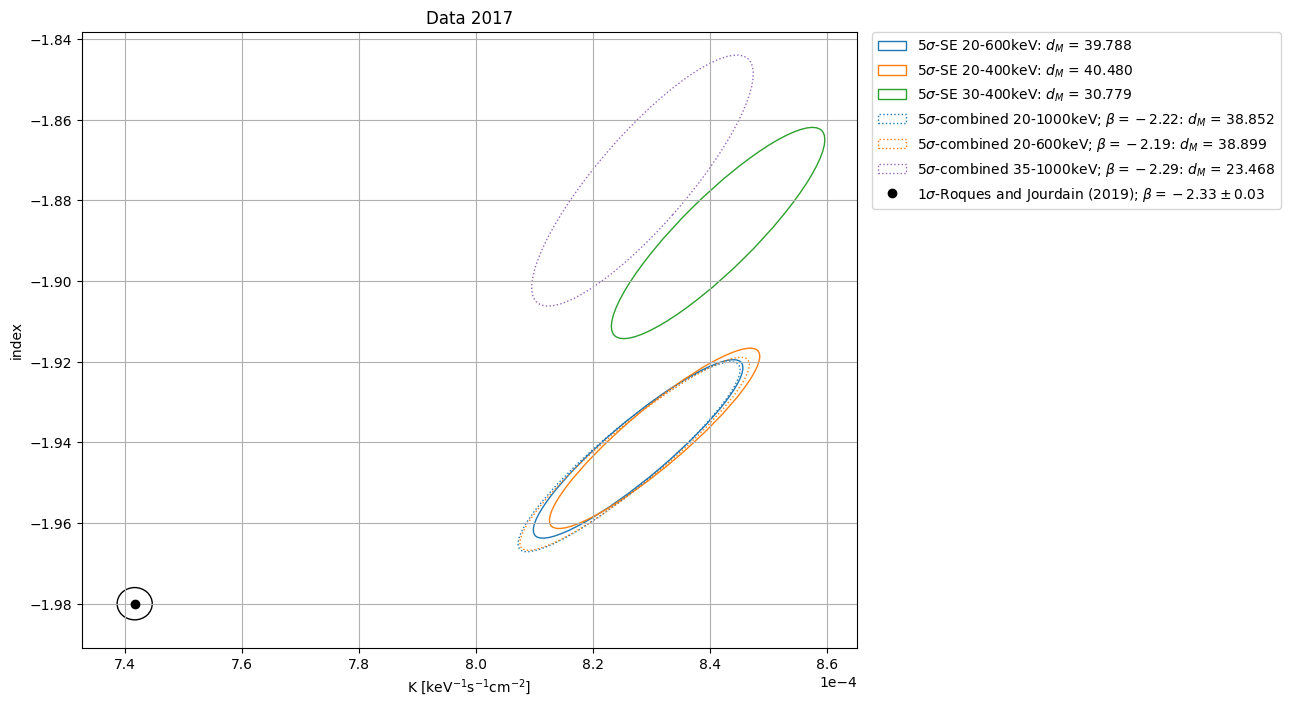

In [75]:
import math
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 8))

for folder, name, edgecolor, linestyle, std_dev in zip(folders, names, edgecolors, linestyles, std_devs):
    val = np.loadtxt(f"{folder}/fit_val.txt")[:2]
    cov = np.loadtxt(f"{folder}/fit_cov.txt")[:2, :2]
    confidence_ellipse(val, cov, ax, n_std=std_dev, edgecolor=edgecolor, label=name, ls=linestyle)
ax.plot(real_vals[0], real_vals[1], "ko", label="1$\sigma$-Roques and Jourdain (2019); $\\beta = -2.33 \pm 0.03$")
confidence_ellipse(real_vals, real_cov, ax, n_std=1, edgecolor="black", ls="solid")
ax.autoscale()
ax.grid()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
#plt.legend()
plt.xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
plt.ylabel("index")
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax.set_title("Data 2017")